# Sentiment Analysis, Twitter, and Donald Trump
Kenia Pina Sanchez and Victoria Lam  
COMP 578 Data Mining

## Table of Contents

* Project proposal
* Dataset
* Analysis tools
* Analysis
* Future Work

## Project Proposal

<!--- Insert a COVID-19 image here --->

In just a few months, COVID-19 became a pandemic that set the world on its heels. Nations scrambled to coordinate an effective response as COVID-19 spread indiscriminately. Donald Trump, whose presidency of the United States has been characterized with inaccurate statements and incohesive positions on a variety of pertinent issues such as healthcare, worker protections, and social safety nets, has tweeted extensively about the progression of theCOVID-19 pandemic, sometimes contradicting his own tweets later in the day.

We examine how his growing concern for COVID-19 affects his position on key issues pertaining to the coming election, such as the health of theeconomy, public perception of himself, and the medical response of key voter states.

This project is therefore a classification problem which gives insight intothe confidences and concerns, and thus the motivations for his actions, of the president as he prepares for the upcoming election.

## Dataset

We scraped twitter for tweets from Donald Trump over a period of January 01, 2020 to April 12, 2020. These tweets and the associated UTC datetime are stored as a .csv file called `trumpTweets.csv`.

In [1]:
library(tidyverse)
library(tidytext)
library(glue)
library(stringr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘glue’


The following object is masked from ‘package:dplyr’:

    collapse




In [2]:
trumpTweets <- read.csv("trumpTweets.csv")

head(trumpTweets)

,X,DateTime,Text
,<int>,<fct>,<fct>
1,0,2020-04-11 23:51:58+00:00,Will be interviewed by @JudgeJeanine tonight at 9:00 P.M. Eastern on @FoxNews!
2,1,2020-04-11 23:34:58+00:00,"So now the Fake News @nytimes is tracing the CoronaVirus origins back to Europe, NOT China. This is a first! I wonder what the Failing New York Times got for this one? Are there any NAMED sources? They were recently thrown out of China like dogs, and obviously want back in. Sad!"
3,2,2020-04-11 23:28:18+00:00,"Governor @GavinNewsom of California has been very nice &amp; highly supportive about the great job we have done, working together, for California. That is the good news, but this is the bad. He is unfairly under attack by the Radical Left Dems, MSDNC etc. He is strong! Will he fold?"
4,3,2020-04-11 22:38:29+00:00,I will be watching. HAVE A GREAT EASTER!
5,4,2020-04-11 22:35:35+00:00,"The Wall Street Journal Editorial Board doesn’t have a clue on how to fight and win. Their views on Tariffs & Trade are losers for the U.S., but winners for other countries, including China. If we followed their standards, we’d have no Country left. They should love Sleepy Joe!"
6,5,2020-04-11 21:53:36+00:00,"Watching @FoxNews on weekend afternoons is a total waste of time. We now have some great alternatives, like @OANN."


## Analysis Tools

* GetOldTweets3 (Python)
* R packages
  * tidyverse
  * tidytext
  * glue
  * stringr

The library `tidyverse` includes a number of dependencies:
* ggplot2
* tibble
* tidyr
* readr
* purrr
* dplyr
* stringr
* forcats

In [3]:
# Replace '$' with '' wherever it occurs
trumpTweets$Text <- gsub('\\$','',trumpTweets$Text)

# Address encoding issues

# Replace '&amp;' with '&'
trumpTweets$Text <- gsub('&amp;','&',trumpTweets$Text)

# Replace '‚Äú' with '"'
trumpTweets$Text <- gsub('‚Äú','"',trumpTweets$Text)

# Replace '‚Äô' with '''
trumpTweets$Text <- gsub('‚Äô',"'",trumpTweets$Text)

# Replace '‚Äì' with ''
trumpTweets$Text <- gsub('‚Äì','',trumpTweets$Text)


trumpTweets

X,DateTime,Text
<int>,<fct>,<chr>
0,2020-04-11 23:51:58+00:00,Will be interviewed by @JudgeJeanine tonight at 9:00 P.M. Eastern on @FoxNews!
1,2020-04-11 23:34:58+00:00,"So now the Fake News @nytimes is tracing the CoronaVirus origins back to Europe, NOT China. This is a first! I wonder what the Failing New York Times got for this one? Are there any NAMED sources? They were recently thrown out of China like dogs, and obviously want back in. Sad!"
2,2020-04-11 23:28:18+00:00,"Governor @GavinNewsom of California has been very nice & highly supportive about the great job we have done, working together, for California. That is the good news, but this is the bad. He is unfairly under attack by the Radical Left Dems, MSDNC etc. He is strong! Will he fold?"
3,2020-04-11 22:38:29+00:00,I will be watching. HAVE A GREAT EASTER!
4,2020-04-11 22:35:35+00:00,"The Wall Street Journal Editorial Board doesn’t have a clue on how to fight and win. Their views on Tariffs & Trade are losers for the U.S., but winners for other countries, including China. If we followed their standards, we’d have no Country left. They should love Sleepy Joe!"
5,2020-04-11 21:53:36+00:00,"Watching @FoxNews on weekend afternoons is a total waste of time. We now have some great alternatives, like @OANN."
6,2020-04-11 21:48:58+00:00,"“The President and the Federal Government are doing an excellent job. When they say the death toll isn’t going to be as high as reported, they (the opposition) act like they’re sad because it’s lower. I think they are (Press Conferences) wonderful.” West Virginia Resident, C Span"
7,2020-04-11 21:36:48+00:00,Great editorial by @SenRonJohnson!
8,2020-04-11 21:08:43+00:00,"Wishing all a safe and blessed Easter Sunday. I will be tuning into Pastor @robertjeffress at http://firstdallas.org/liveworship Church in Dallas, Texas tomorrow morning at 10:20 AM Eastern."


### Augmenting `bing`

In [21]:
# Tokenize
tokens <- tibble(text=trumpTweets$Text) %>% unnest_tokens(word,text)
tokens

word
<chr>
will
be
interviewed
by
judgejeanine
tonight
at
9
00


In [5]:
# Create a database containing all words in the sentiment lexicon
# We are using bing.
bingWords <- get_sentiments('bing')[,1]

In [6]:
# Identify non-stop words that do not occur in bing
wordsByFreq <- tokens %>%
  anti_join(stop_words) %>%  # Remove stop words
  anti_join(bingWords) %>%   # Remove words in bing
  count(word,sort=T)         # Sort by frequency of each word

Joining, by = "word"

Joining, by = "word"



In [7]:
wordsByFreq

word,n
<chr>,<int>
news,119
people,104
democrats,94
president,86
house,72
foxnews,66
impeachment,65
american,63
bernie,58


In [8]:
# Looks like identifying the top 100 commonest words will do
top100 <- top_n(wordsByFreq,100)

write.csv(top100,'top100.csv')

Selecting by n



In [9]:
head(get_sentiments('bing'))

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative


We need to assign sentiments to each word in the dataset.

In [10]:
# Make a dataframe to hold the augmented lexicon
bingTrump <- tibble()

### Getting the Sentiments for Each Tweet

In [94]:
sentiments <- tibble()

In [95]:
for (i in 1:nrow(trumpTweets)){
    
    # Tokenize the ith tweet
    tokens <- tibble(text=trumpTweets$Text[i]) %>% unnest_tokens(word,text)
    
    # Get sentiment values for each token
    sentimented <- tokens %>% inner_join(get_sentiments('bing'))
    
    # Calculate how many negative words, how many positive, and overall sentiment
    positive <- sum(sentimented$sentiment=='positive')
    negative <- sum(sentimented$sentiment=='negative')
    sentiment <- positive-negative
    
    # Put sentiment information in a new row
    newRow <- tibble(idx=i,
                    positive=positive,
                    negative=negative,
                    sentiment=sentiment,
                    DateTime=trumpTweets$DateTime[i],
                    Text=trumpTweets$Text[i])
    
    # Add the new row to the dataframe containing sentiment info
    sentiments <- bind_rows(sentiments,newRow)
    
}

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, b

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, b

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, b

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, by = "word"

Joining, b

In [96]:
sentiments

idx,positive,negative,sentiment,DateTime,Text
<int>,<int>,<int>,<int>,<fct>,<chr>
1,0,0,0,2020-04-11 23:51:58+00:00,Will be interviewed by @JudgeJeanine tonight at 9:00 P.M. Eastern on @FoxNews!
2,2,3,-1,2020-04-11 23:34:58+00:00,"So now the Fake News @nytimes is tracing the CoronaVirus origins back to Europe, NOT China. This is a first! I wonder what the Failing New York Times got for this one? Are there any NAMED sources? They were recently thrown out of China like dogs, and obviously want back in. Sad!"
3,5,4,1,2020-04-11 23:28:18+00:00,"Governor @GavinNewsom of California has been very nice & highly supportive about the great job we have done, working together, for California. That is the good news, but this is the bad. He is unfairly under attack by the Radical Left Dems, MSDNC etc. He is strong! Will he fold?"
4,1,0,1,2020-04-11 22:38:29+00:00,I will be watching. HAVE A GREAT EASTER!
5,3,1,2,2020-04-11 22:35:35+00:00,"The Wall Street Journal Editorial Board doesn’t have a clue on how to fight and win. Their views on Tariffs & Trade are losers for the U.S., but winners for other countries, including China. If we followed their standards, we’d have no Country left. They should love Sleepy Joe!"
6,2,1,1,2020-04-11 21:53:36+00:00,"Watching @FoxNews on weekend afternoons is a total waste of time. We now have some great alternatives, like @OANN."
7,3,4,-1,2020-04-11 21:48:58+00:00,"“The President and the Federal Government are doing an excellent job. When they say the death toll isn’t going to be as high as reported, they (the opposition) act like they’re sad because it’s lower. I think they are (Press Conferences) wonderful.” West Virginia Resident, C Span"
8,1,0,1,2020-04-11 21:36:48+00:00,Great editorial by @SenRonJohnson!
9,1,0,1,2020-04-11 21:08:43+00:00,"Wishing all a safe and blessed Easter Sunday. I will be tuning into Pastor @robertjeffress at http://firstdallas.org/liveworship Church in Dallas, Texas tomorrow morning at 10:20 AM Eastern."


## Analysis

In [97]:
summary(sentiments)

      idx          positive        negative        sentiment      
 Min.   :   1   Min.   :0.000   Min.   :0.0000   Min.   :-6.0000  
 1st Qu.: 328   1st Qu.:0.000   1st Qu.:0.0000   1st Qu.: 0.0000  
 Median : 655   Median :1.000   Median :0.0000   Median : 0.0000  
 Mean   : 655   Mean   :1.429   Mean   :0.9251   Mean   : 0.5034  
 3rd Qu.: 982   3rd Qu.:2.000   3rd Qu.:1.0000   3rd Qu.: 1.0000  
 Max.   :1309   Max.   :8.000   Max.   :7.0000   Max.   : 8.0000  
                                                                  
                      DateTime        Text          
 2020-01-27 05:18:33+00:00:   3   Length:1309       
 2020-02-18 15:29:43+00:00:   3   Class :character  
 2020-01-03 13:54:43+00:00:   2   Mode  :character  
 2020-01-03 17:27:08+00:00:   2                     
 2020-01-04 22:52:05+00:00:   2                     
 2020-01-12 14:26:51+00:00:   2                     
 (Other)                  :1295                     

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



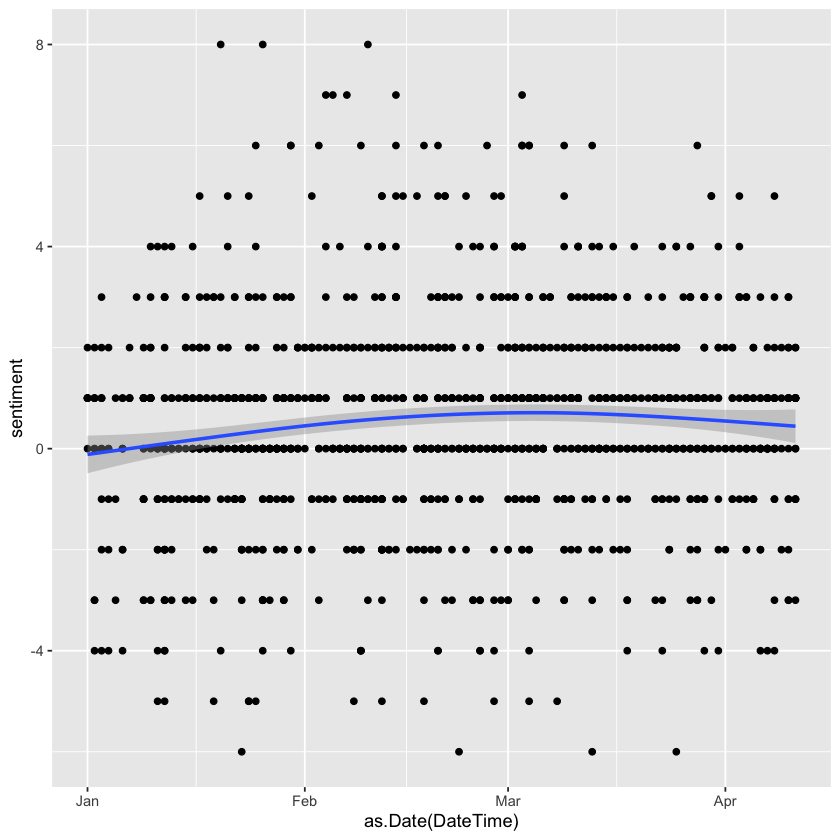

In [105]:
# A little basic visualization
ggplot(sentiments,aes(x=as.Date(DateTime),y=sentiment)) +
  geom_point(aes()) +
  geom_smooth(method='auto')

It's possible it'd be good to use a trimmed mean sentiment value for each week, because some tweets are super super negative or super super positive. Perhaps 10% trimmed mean?

We want to add week labels to the dataframe. Or I suppose we could just filter by dates.

Something like:

```
weekn <- sentiments[DateTime>=startdate&DateTime<enddate]
```

or

```
weekn <- filter(sentiments,DateTime<=startdate&DateTime<enddate)
```

Or do by hand via idx.

ERROR: Error in as.DateTime(trumpTweets$DateTime[2]): could not find function "as.DateTime"


## Future Work

* Encoding issue in tweet text